In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import scipy.signal as scsig
import scipy.io as scio
import h5py
import sharpy.utils.h5utils as h5utils
import sharpy.utils.algebra as algebra
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [63]:
case_directory = './output/simple_HALE_mass_centredrop/'
refuel_directory = './output/simple_HALE_mass_centrerefuel/'

In [64]:
dt = 1 / 10 / 16

In [65]:
vel_a = np.loadtxt(case_directory + 'WriteVariablesTime/FoR_00_for_vel.dat')[:, 1:4]
r_vel_a = np.loadtxt(refuel_directory + 'WriteVariablesTime/FoR_00_for_vel.dat')[:, 1:4]

In [14]:
t = np.arange(vel_a.shape[0]) * dt

In [66]:
pos = np.loadtxt(case_directory + 'WriteVariablesTime/FoR_00_for_pos.dat')[:, 1:4]
r_pos = np.loadtxt(refuel_directory + 'WriteVariablesTime/FoR_00_for_pos.dat')[:, 1:4]

In [18]:
quat = np.loadtxt(case_directory + 'WriteVariablesTime/FoR_00_quat.dat')[:, 1:]
euler = np.array([algebra.quat2euler(quat[i, :]) for i in range(quat.shape[0])])

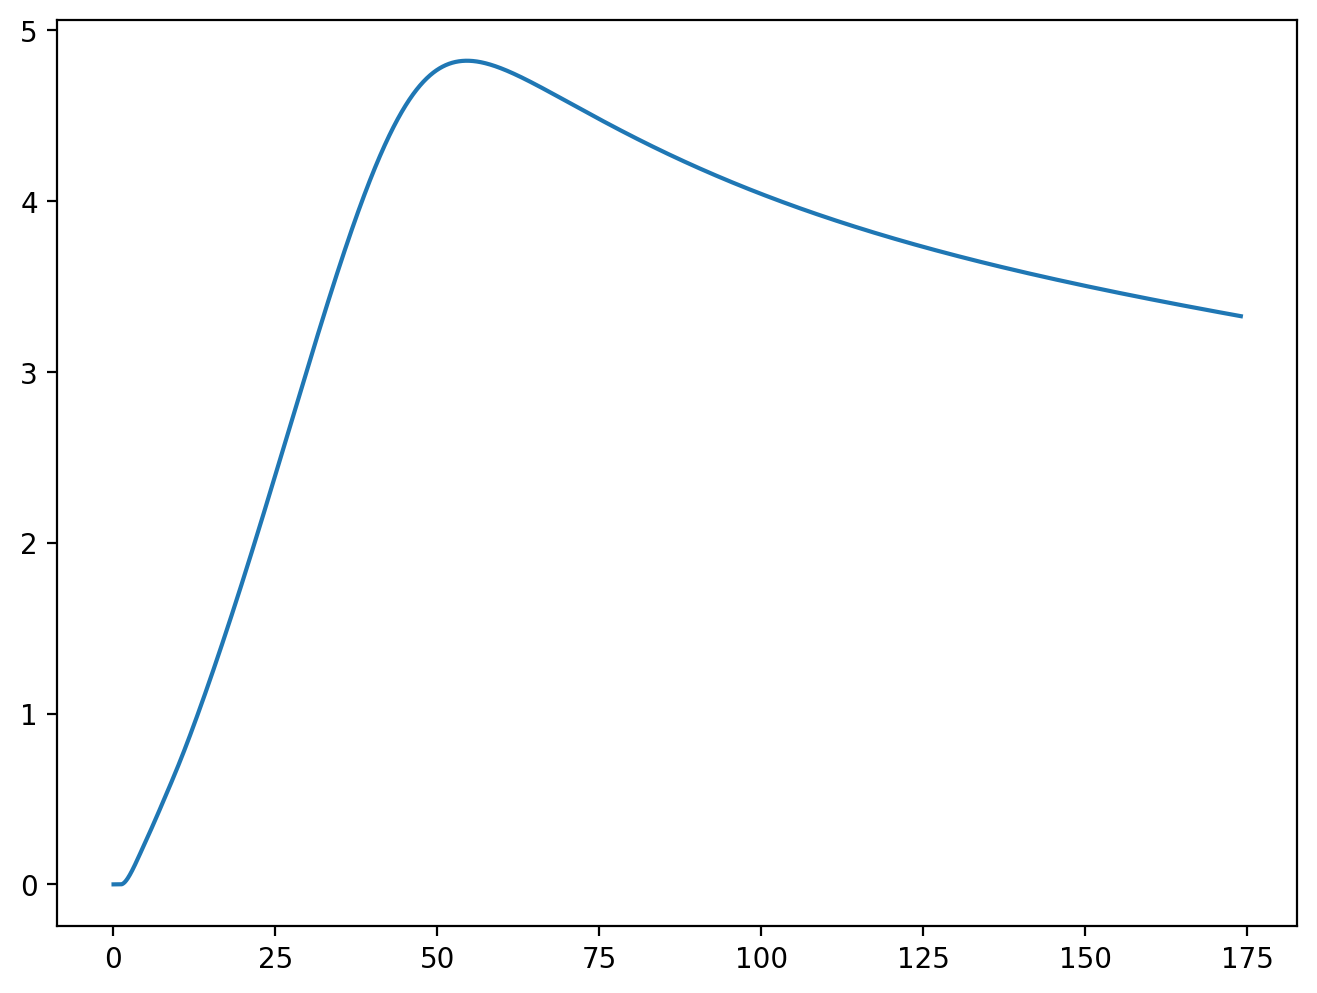

In [76]:
plt.plot(-1 * pos[:, 0], pos[:, 2])
# plt.plot(r_pos[:, 0], r_pos[:, 2])

Text(0, 0.5, 'TAS')

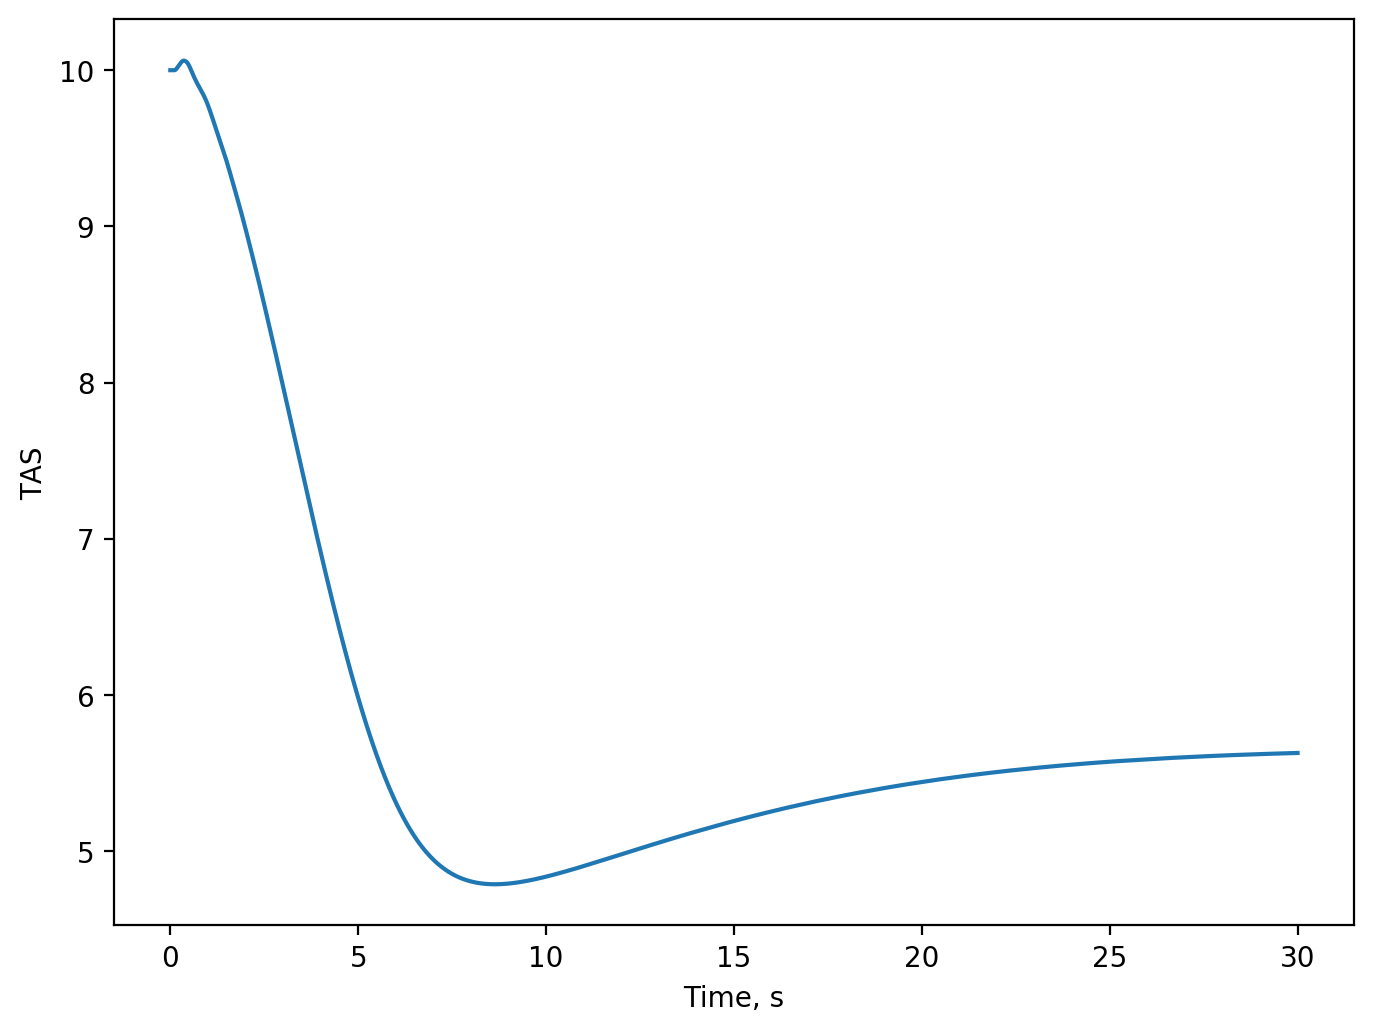

In [69]:
plt.plot(t, np.linalg.norm(vel_a, axis=1))
# plt.plot(t, np.linalg.norm(r_vel_a, axis=1))
plt.xlabel('Time, s')
plt.ylabel('TAS')

In [10]:
aoa = np.arctan(vel_a[:, 2]/vel_a[:, 0])

Text(0, 0.5, 'Angle, deg')

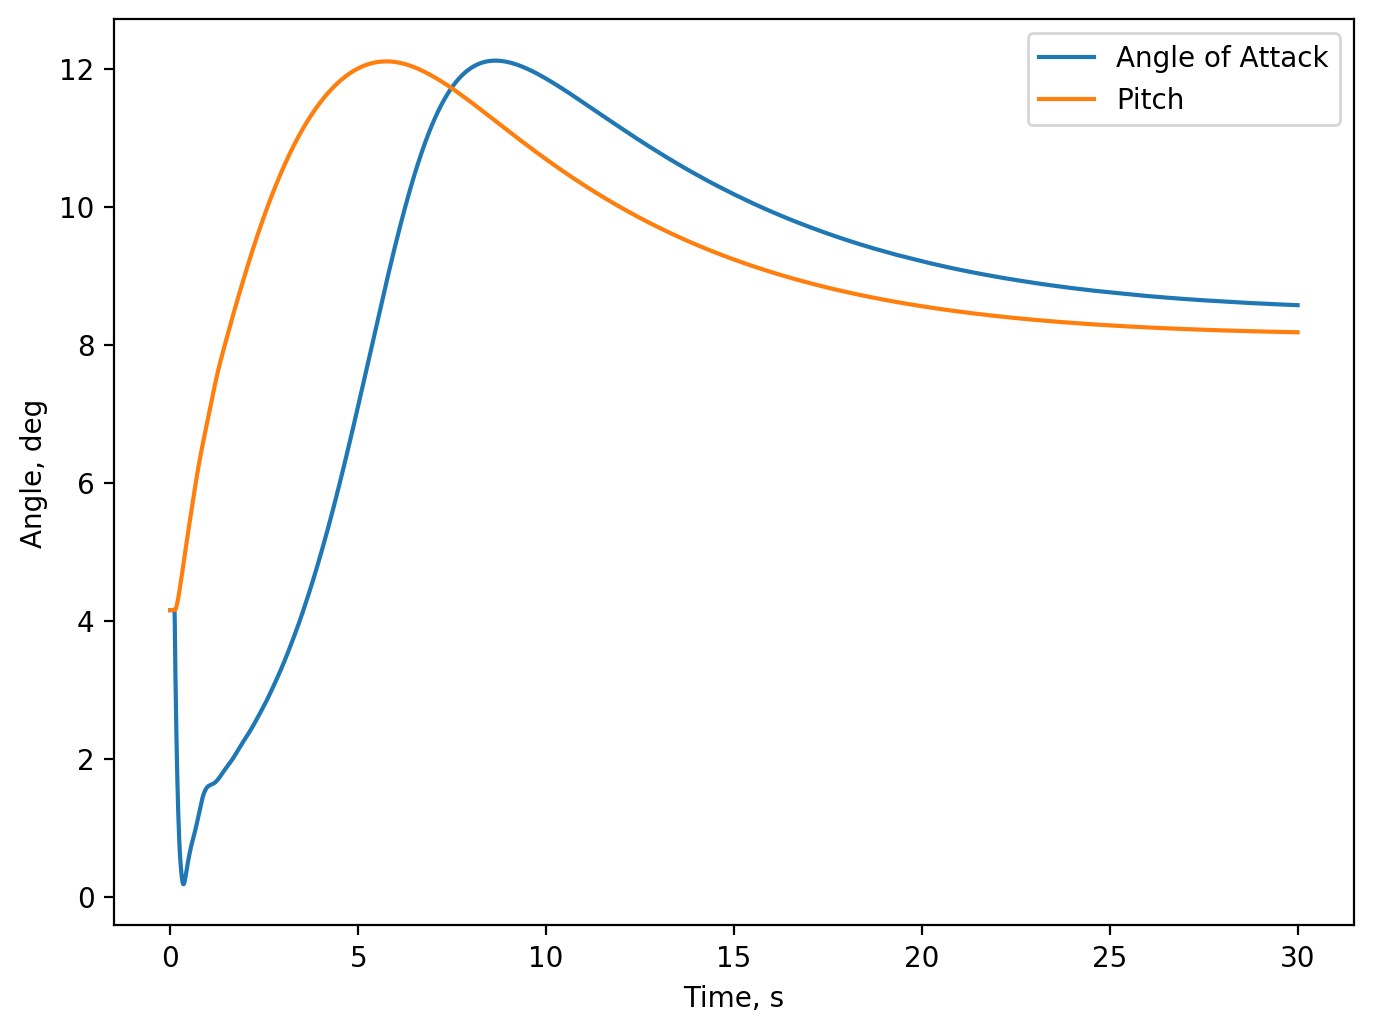

In [21]:
plt.plot(t, aoa * 180/np.pi, label='Angle of Attack')
plt.plot(t, euler[:, 1] * 180/np.pi, label='Pitch')
plt.legend()
plt.xlabel('Time, s')
plt.ylabel('Angle, deg')

In [55]:
np.savetxt('./centre_drop.txt', np.column_stack((t, aoa, euler[:, 1])))

In [22]:
# quick check on something else
data = scio.loadmat('../04_AeroROM/output/simple_HALE_nuvlm_ntb_alpha0000_lm1_rom1_nmodes20/simple_HALE_nuvlm_ntb_alpha0000_lm1_rom1_nmodes20/simple_HALE_nuvlm_ntb_alpha0000_lm1_rom1_nmodes20.linss.mat')

In [23]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'C', 'D', 'zeta', 'zeta_dot', 'u_ext', 'forces_aero', 'eta', 'eta_dot', 'forces_struct', 'forces_aero_beam_dof', 'mode_shapes', 'dt'])

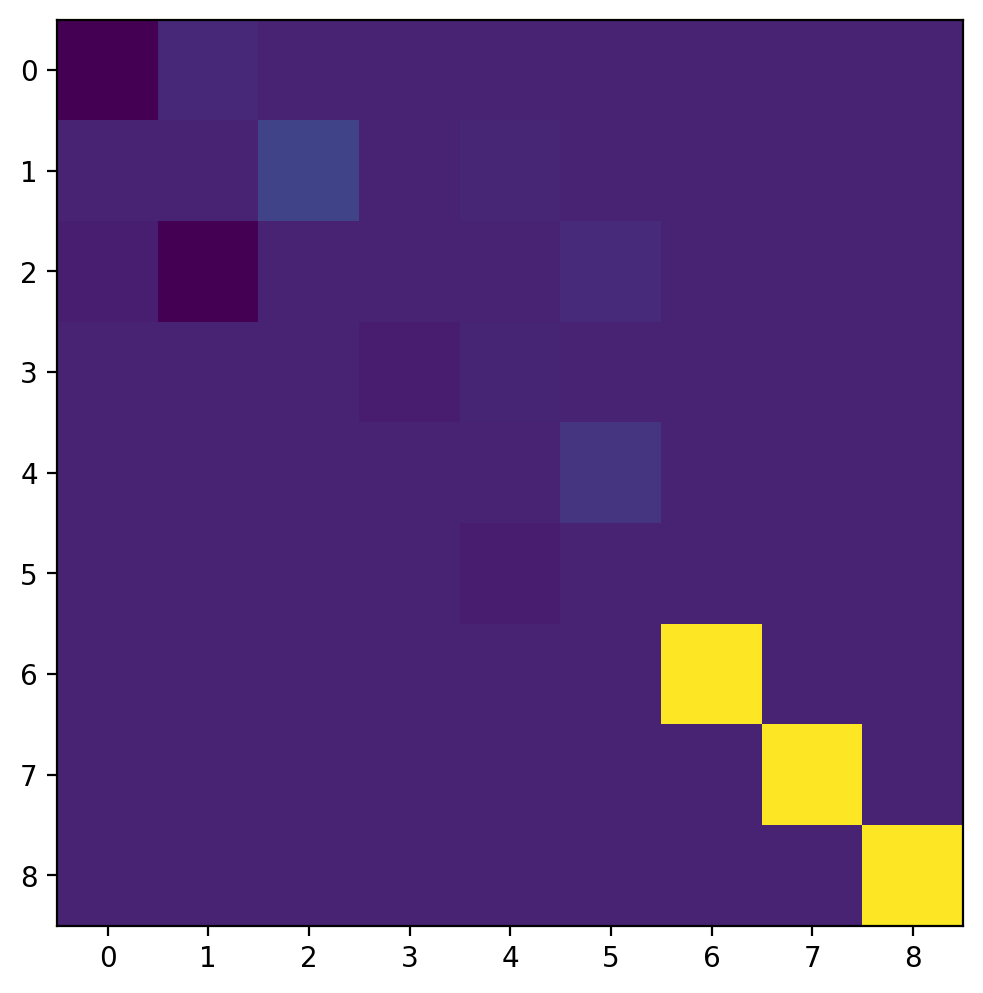

In [25]:
data['mode_shapes'][-9:, :9]
plt.imshow(data['mode_shapes'][-9:, :9])

In [48]:
uvlm = scio.loadmat('../04_AeroROM/output/simple_HALE_nuvlm_ntb_alpha0400_lm1_rom1_nmodes20/simple_HALE_nuvlm_ntb_alpha0400_lm1_rom1_nmodes20/simple_HALE_nuvlm_ntb_alpha0400_lm1_rom1_nmodes20.uvlmss.mat')

In [49]:
uvlm.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'C', 'D', 'zeta', 'zeta_dot', 'u_ext', 'forces_aero', 'dt'])

In [50]:
uvlm['D'].shape

(20, 44)

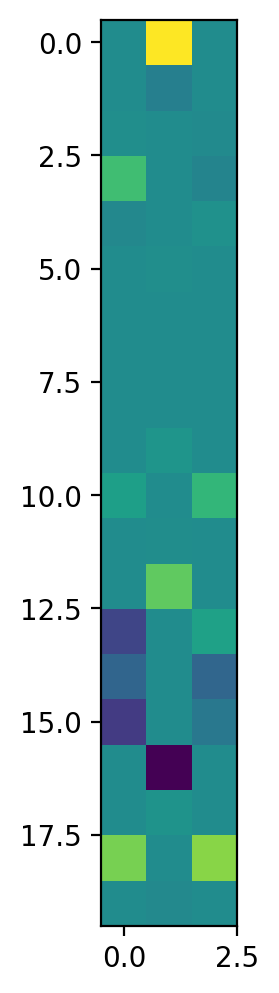

In [51]:
plt.imshow(uvlm['D'][:, 26:29])

In [52]:
H = uvlm['C'].dot(np.linalg.inv(np.eye(uvlm['A'].shape[0]) - uvlm['A']).dot(uvlm['B'])) + uvlm['D']

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


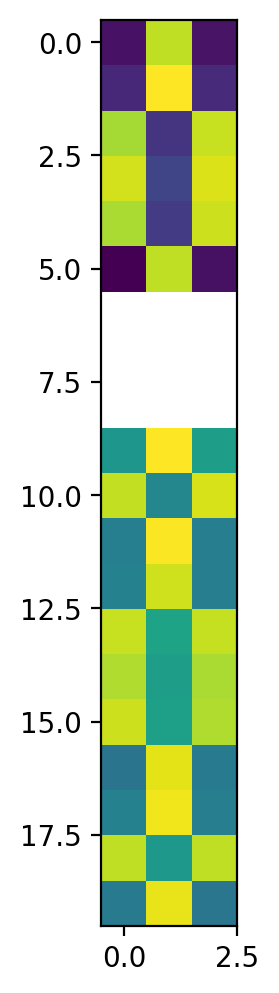

In [53]:
plt.imshow(np.log10(H.__abs__())[:, 26:29])

In [45]:
uvlm = scio.loadmat('../04_AeroROM/output/TEST_simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20/TEST_simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20/TEST_simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20.uvlmss.mat')

In [46]:
H = uvlm['C'].dot(np.linalg.inv(np.eye(uvlm['A'].shape[0]) - uvlm['A']).dot(uvlm['B'])) + uvlm['D']

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


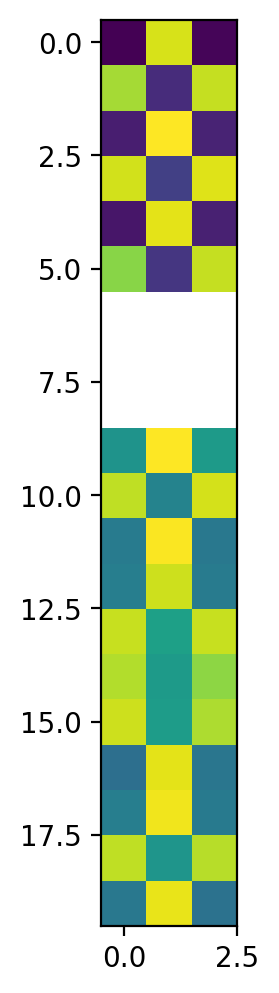

In [47]:
plt.imshow(np.log10(H.__abs__())[:, 26:29])